
---

---
# Modelos de Distribuição de Probabilidade

Este notebook apresenta funções existentes em bibliotecas Python para geração de dados e cálculos de probabilidades a partir dos modelos de distribuição de probabilidades Binomial, Poisson e Normal (estudados nas aulas).

---

---









---


## Geração aleatória de dados

---



### *Distribuição uniforme*

Gera 10.000 valores aleatórios no intervalo [-10,10] uniformemente distribuídos.

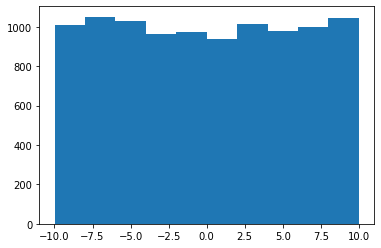

In [1]:
import numpy as np
import matplotlib.pyplot as plt

valores = np.random.uniform(-10.0, 10.0, 10000) 
plt.hist(valores,10) # histograma
plt.show()

###*Distribuição binomial*

Amostras são geradas a partir de uma distribuição binomial considerando n tentativas com probabilidade de sucesso igual a p. Você pode considerar sucesso igual a 1 e fracasso igual a 0.

No código abaixo a probailidade de sucesso p = 0.5. Você pode imaginar então que está jogando uma moeda n vezes (1 seria cara e 0 coroa).

A variável resultado armazena o número de sucessos (número de vezes que saiu 1) nas n tentativas.

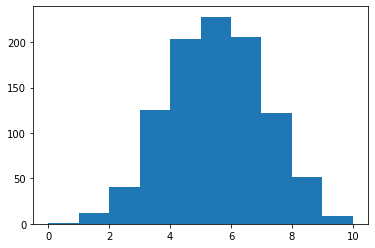

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n, p = 10, 0.5
resultados = np.random.binomial(n,p,1000)  # as n tentativas são executadas 1000 vezes
plt.hist(resultados) # histograma
plt.show()

###*Distribuição de Poisson*

Amostras são geradas a partir de uma distribuição de Poisson.

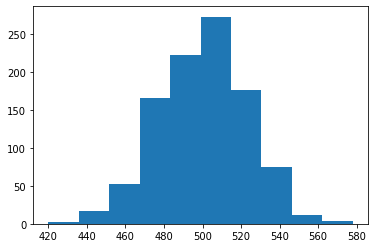

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lamb = 500 # lambda (média)
resultados = np.random.poisson(lamb,1000)  # executada 1000 vezes
plt.hist(resultados) # histograma
plt.show()

###*Distribuição normal*

Gera 10.000 valores aleatórios distribuídos normalmente com média igual 5 e desvio padrão igual a 2.

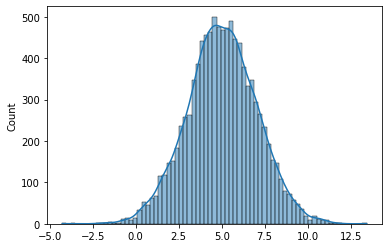

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mu = 5.0 # média
sigma = 2.0 # desvio padrão
valores = np.random.normal(mu, sigma, 10000)
#plt.hist(valores)
sns.histplot(valores, kde=True)
plt.show()



---


## Cálculos de probabilidades


---



###*Distribuição Binomial*

Jogando uma moeda 10 vezes, qual a probabilidade de obter 3 "caras"?

In [5]:
import math

n = 10
x = 3
p = 0.5

(math.factorial(n)) / (math.factorial(x) * math.factorial(n - x)) * math.pow(p, x) * math.pow(1 - p, n - x)

0.1171875

OBS: A relação entre os eventos para uma variável aleatória discreta e suas probabilidades é chamada de distribuição de probabilidade discreta e é resumida por uma função massa de probabilidade, ou PMF (Probability Mass Function).

In [6]:
from scipy import stats

stats.binom.pmf(x, n, p)

0.11718750000000014

###*Distribuição de Poisson*

O número médio de acidentes de trânsito por dia é 10. Qual a probabilidade de ocorrerem 20 amanhã?

In [7]:
lamb = 10
x = 20
math.pow(math.e, -lamb) * (math.pow(lamb, x) / math.factorial(x))

0.0018660813139987605

In [8]:
stats.poisson.pmf(x, lamb)

0.0018660813139987742

###*Distribuição Normal*

A vida útil de uma marca de pneus é representada por uma distribuição normal com média de 38.000 Km e desvio padrão de 3.000 Km.

a-) Qual a probabilidade de que ele dure menos que 25.000 Km?

b-) Qual a probabilidade de que um pneu escolhido aleatoriamente tenha vida útil maior que 40.000 Km?

c-) Qual a probabilidade de que ele dure entre 25.000 e 40.000 Km?

d-) Qual a probabilidade de que ele dure 45.000 Km?

In [9]:
mu = 38000 # média
sigma = 3000 # desvio padrão


*Obs: CDF : Função de distribuição cumulativa (ou acumulada), retorna a probabilidade de um valor menor ou igual a um determinado resultado.*
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

item a-)

In [10]:
x1 = 25000
stats.norm.cdf(x1, mu, sigma)  

7.343423836894689e-06

item b-)

In [11]:
x2 = 40000
1 - stats.norm.cdf(x2, mu, sigma)  

0.2524925375469229

item c-)

In [12]:
stats.norm.cdf(x2, mu, sigma) - stats.norm.cdf(x1, mu, sigma)  

0.7475001190292402

*Obs: Se uma variável aleatória é contínua, a probabilidade pode ser calculada por meio da função de densidade de probabilidade (ou PDF)*

item d-)

In [13]:
stats.norm.pdf(45000, mu, sigma) 

8.740629697903161e-06